In [1]:
#https://fxdata.cloud/tutorials/a-guide-for-time-series-forecasting-with-arima-in-python-3
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
#change Server=your server name in SQL management studio
%matplotlib inline
import pyodbc 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-RHQE0PFG\MSSQLSERVER01;"
                      "Database=AdventureWorks2016;"
                      "Trusted_Connection=yes;")

In [2]:
#df = pd.read_sql_query(""" 
#SELECT A.[SalesOrderID]
#,A.[LineTotal]
#,B.[OrderDate]
#,B.OnlineOrderFlag
#,case when B.OnlineOrderFlag = 0 then 'Reseller Sale' 
#when B.OnlineOrderFlag = 1 then 'Online Sale' end as SalesCategory
#,C.[Name]
#FROM [Sales].[SalesOrderDetail] AS A
#LEFT JOIN [Sales].[SalesOrderHeader] AS B
#ON A.SalesOrderID = B.SalesOrderID
#LEFT JOIN [Sales].[SalesTerritory] AS C
#ON B.TerritoryID = C.TerritoryID
#WHERE C.[Name]""", cnxn)

In [3]:
#List of regions
#Northwest, Northeast, Central, Southwest, Southeast, Canada, France, Germany, Australia, United Kingdom

In [4]:
df = pd.read_sql_query(""" 
SELECT
A.[LineTotal]
,B.[OrderDate]
FROM [Sales].[SalesOrderDetail] AS A
LEFT JOIN [Sales].[SalesOrderHeader] AS B
ON A.SalesOrderID = B.SalesOrderID
LEFT JOIN [Sales].[SalesTerritory] AS C
ON B.TerritoryID = C.TerritoryID
WHERE C.[Name] = 'Northwest'
""", cnxn)

In [5]:
df.head(5)

,LineTotal,OrderDate
0,2039.9940,2011-05-31
1,8099.9760,2011-05-31
2,28.8404,2011-05-31
3,28.8404,2011-05-31
4,4049.9880,2011-05-31


In [6]:
df = df.set_index(['OrderDate'])

In [7]:
#Summarise the transactions by order month
# The 'MS' string groups the data in buckets by start of the month
y = df['LineTotal'].resample('MS').sum()

In [8]:
y.head(5)

OrderDate
2011-05-01     97305.595100
2011-06-01     55186.504600
2011-07-01    340025.566700
2011-08-01    443293.676826
2011-09-01     58968.054600
Freq: MS, Name: LineTotal, dtype: float64

In [9]:
# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

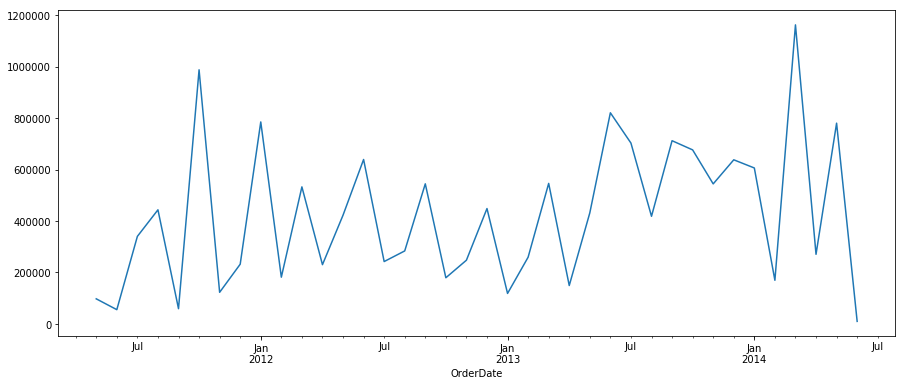

In [10]:
y.plot(figsize=(15, 6))
plt.show()

In [11]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1079.7857027485782
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2528419.062475783
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:719.2531509559483
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:746.5160276142358
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1066.6987716551803
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:402.1771565230186
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1045.6515273310442
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2382886.1010620883
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:688.8978774914189
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:752.5162397556904
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2347351.5594030907
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:404.0467224722989
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1039.3082542775421
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:708.912262889068
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:720.4403621517589
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:378.2107005978733
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - 

In [13]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 model - AIC:717.9012001949678


In [14]:
# print statistics
print(res.aic)
print(res.summary())

1036.74023734
                                 Statespace Model Results                                 
Dep. Variable:                          LineTotal   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 12)   Log Likelihood                -514.370
Date:                            Thu, 25 Apr 2019   AIC                           1036.740
Time:                                    13:18:46   BIC                           1043.184
Sample:                                05-01-2011   HQIC                          1039.012
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5338      0.181     -2.955      0.003      -0.888      -0.180
ma.L1         -0.6615

In [15]:
plt.style.use('fivethirtyeight')
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [16]:
# print statistics
#print(result.aic)
#print(result.summary())

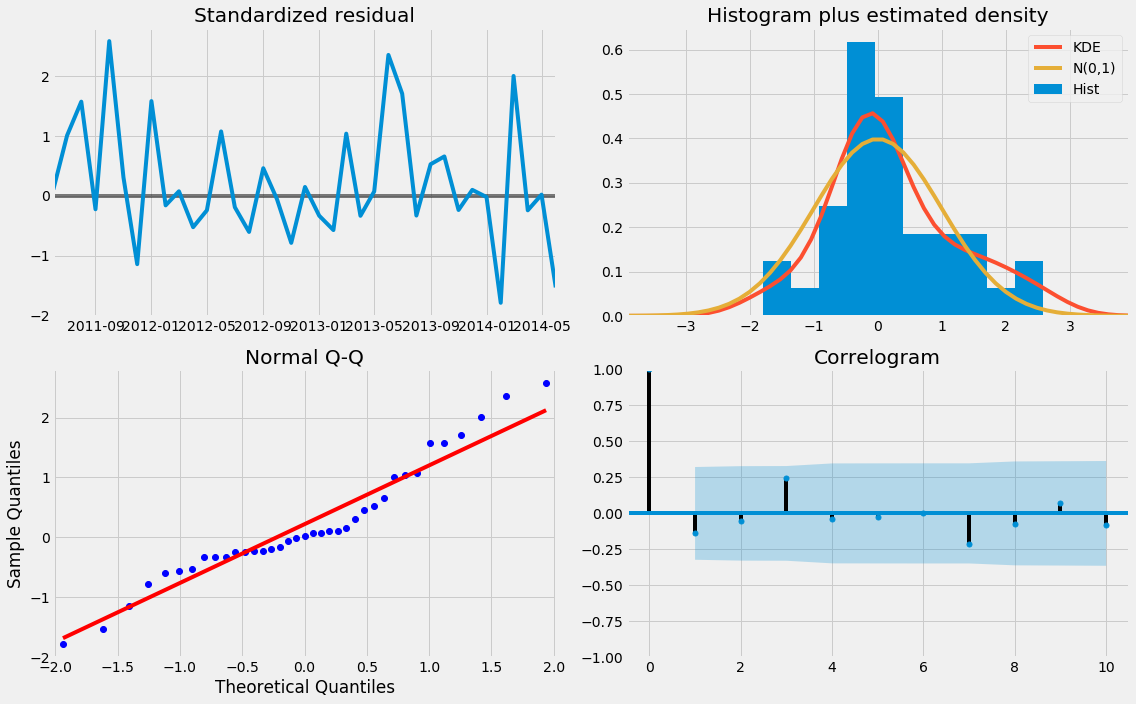

In [17]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

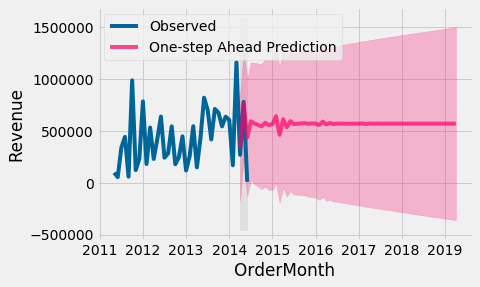

In [18]:
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2014-04-01'), 
                          end=pd.to_datetime('2019-04-01'),
                          dynamic=True)
pred_ci = pred.conf_int()
 
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');
 
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
 
# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-04-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

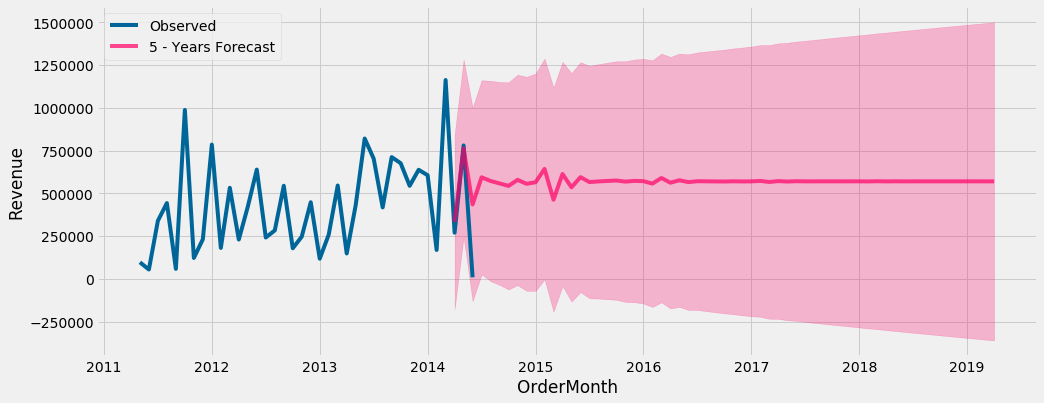

In [19]:
#pred.predicted_mean
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(figsize=(15, 6),label='5 - Years Forecast', alpha=.7, color='#ff0066')
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
#y.plot(figsize=(15, 6))
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

In [20]:
all_dfs = [y, pred.predicted_mean]

In [21]:
df = pd.DataFrame(np.array(pd.concat(all_dfs).reset_index(drop=False)), columns =  ['Month', 'Revenue'])

In [22]:
df = df.set_index(['Month'])

In [23]:
#df.plot(label='Revenue',color='#006699');
df.plot(figsize=(15, 6))df.head(5)df.tail(5)

SyntaxError: invalid syntax (<ipython-input-23-0c9ef4cd28d2>, line 2)

In [24]:
df.head(5)df.tail(5)

SyntaxError: invalid syntax (<ipython-input-24-a52fcbbc6b71>, line 1)

In [25]:
df.tail(5)

,Revenue
Month,
2018-12-01,570250
2019-01-01,570260
2019-02-01,570345
2019-03-01,570148
2019-04-01,570313
